# **NUS SDS Datathon 2025**
## Category B Team 28

### **Important Note!**
Please ensure that **all** the code in this notebook are **executed in order**, especially following the instructions to replace the path of the data. This is important as it ensures that the environment is set up the necessary environment and preprocessing steps required for model training and testing.


# Setting up

In [1]:
# Installing necessary libraries
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install xgboost
%pip install optuna
%pip install imblearn
%pip install gensim


[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
PATH = '/Users/charmaineneo/Downloads/Champions_Group_2025/Champions_Group_2025.csv'
df = pd.read_csv(PATH)

# Exploratory Data Analysis

In [4]:
df.head()
df.info()
df.describe(include='all') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  int64  
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  int64  
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Parent Company                       28668 non-null  object 
 10  Parent Country                       28662 non-null  object 
 11  Ownership Type              

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,...,Company Status (Active/Inactive),Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182,29182,29182.000000,29182,2.918200e+04,29182,28748.000000,28668,...,29182,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,6613,6737,29182.000000,29182.000000
unique,NaN,NaN,29182,29182,NaN,580,NaN,2191,NaN,17882,...,1,NaN,NaN,NaN,NaN,NaN,3,115,NaN,NaN
top,NaN,NaN,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,NaN,"Offices of Holding Companies, Not Elsewhere Cl...",NaN,"Holding companies, nec",NaN,GIC (VENTURES) PTE. LTD.,...,Active,NaN,NaN,NaN,NaN,NaN,Both Imports & Exports,2021-12-31T05:00:00Z,NaN,NaN
freq,NaN,NaN,1,1,NaN,7753,NaN,6490,NaN,288,...,29182,NaN,NaN,NaN,NaN,NaN,4254,1959,NaN,NaN
mean,1.320677,103.843324,NaN,NaN,6169.271160,NaN,6.169092e+07,NaN,2004.505913,NaN,...,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,NaN,NaN,0.500069,0.257248
std,0.043740,0.053757,NaN,NaN,1705.845535,NaN,1.705778e+07,NaN,13.464238,NaN,...,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,NaN,NaN,0.500009,0.437125
min,1.238792,103.611319,NaN,NaN,132.000000,NaN,1.320000e+06,NaN,1819.000000,NaN,...,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,NaN,NaN,0.000000,0.000000
25%,1.284665,103.831874,NaN,NaN,5084.000000,NaN,5.084000e+07,NaN,1997.000000,NaN,...,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,NaN,NaN,0.000000,0.000000
50%,1.309701,103.848989,NaN,NaN,6719.000000,NaN,6.719000e+07,NaN,2008.000000,NaN,...,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,NaN,NaN,1.000000,0.000000
75%,1.337889,103.865922,NaN,NaN,7311.000000,NaN,7.311000e+07,NaN,2014.000000,NaN,...,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,NaN,NaN,1.000000,1.000000


# Data Cleaning and Manipulation

## Data Type Conversion

The function ```convert_data(df)``` takes in the dataset and converts all data types into their appropriate types, and conducts label encoding on the 'Ownership Type' column and embedded encoding on 'Industry' column.

In [5]:
def convert_data(df): ## takes in original dataset and returns data converted and categorical variables encoded

    if {'Parent Company','Parent Country'}.issubset(df.columns):
        df = df.drop(columns =['Parent Company','Parent Country']) # removing these columns following competition instructions

    df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
    df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')
    df['SIC Code'] = df['SIC Code'].astype(int)
    df['Industry'] = df['Industry'].astype(str)
    df['Year Found'] = pd.to_numeric(df['Year Found'], errors='coerce')
    df['Company Description'] = df['Company Description'].astype(str)
    df['Employees (Single Site)'] = pd.to_numeric(df['Employees (Single Site)'], errors='coerce')
    df['Employees (Domestic Ultimate Total)'] = pd.to_numeric(df['Employees (Domestic Ultimate Total)'], errors='coerce')
    df['Employees (Global Ultimate Total)'] = pd.to_numeric(df['Employees (Global Ultimate Total)'], errors='coerce')
    df['Sales (Domestic Ultimate Total USD)'] = df['Sales (Domestic Ultimate Total USD)'].astype(int)
    df['Sales (Global Ultimate Total USD)'] = df['Sales (Global Ultimate Total USD)'].astype(int)
    df['Is Domestic Ultimate'] = df['Is Domestic Ultimate'].astype(int)
    df['Is Global Ultimate'] = df['Is Global Ultimate'].astype(int)

    ## Drop duplicated rows
    df = df.drop_duplicates()


    ## Label encoding for 'Ownership Type' Column
    label_encoder = LabelEncoder()
    df['Ownership_encoded'] = label_encoder.fit_transform(df['Ownership Type'])

    ## Embedded encoding for 'Industry' Column

    # Convert industry column into a list of lists
    industries = df['Industry'].astype(str).tolist()
    industries = [[i] for i in industries]  # Convert to list of lists

    # Train Word2Vec model
    w2v = Word2Vec(sentences=industries, vector_size=5, min_count=1, workers=4)

    # Function to encode each industry
    def encode_industry(industry):
        if industry in w2v.wv:
            return w2v.wv[industry]
        else:
            return np.zeros(5)  # Default vector if industry is not found

    # Apply encoding
    df['Industry_encoded'] = df['Industry'].apply(encode_industry)

    # Convert to DataFrame (flatten lists)
    industry_embeddings = pd.DataFrame(df['Industry_encoded'].tolist(), columns=[f"industry_dim_{i}" for i in range(len(df['Industry_encoded'][0]))])

    # Merge back into original dataset
    df = df.drop(columns=['Industry_encoded']).join(industry_embeddings)
    
    return df

df = convert_data(df)

## Handling Missing Values

### Dropping specific columns (100% null and irrelevant features)

The function ```drop_columns(df)``` takes in the dataset and drops all columns that we have deemed irrelevant to our target variable (refer to report for details).

In [6]:
def drop_columns(df):

    # Calculate percentage of missing values in all columns
    missing_values = df.isna().sum()
    total_rows = len(df)
    missing_percentage = (missing_values / total_rows) * 100
    missing_df = pd.DataFrame({'Percentage of Nulls': missing_percentage})

    # Sort by percentage of nulls in descending order
    missing_df.sort_values(by='Percentage of Nulls', ascending=False, inplace=True)

    # Get columns where the percentage of null values is 100%
    columns_to_drop = missing_df[missing_percentage == 100].index

    # Drop columns with 100% null
    df = df.drop(columns=columns_to_drop)

    # Drop irrelevant columns
    irrelevant_columns = ['AccountID','Company', '8-Digit SIC Description', 'Company Description', 'Company Status (Active/Inactive)']
    df = df.drop(columns = irrelevant_columns)
    return df

df = drop_columns(df)

/var/folders/x1/p2dk3vss0fl3mhn_3cftdjy80000gn/T/ipykernel_59963/3814699513.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  columns_to_drop = missing_df[missing_percentage == 100].index


### Dropping missing values

The function ```drop_NA(df)``` takes in the dataset and removed all columns with high percentage of missing values.

In [7]:
def drop_NA(df):
    
    # Calculate percentage of missing values in 'Import/Export Status'
    missing_values = df['Import/Export Status'].isnull().sum()
    total_rows = len(df)
    missing_percentage = (missing_values / total_rows) * 100
    print(f"Percentage of Missing Values in Import/Export Status: {missing_percentage:.2f}%")

    """Percentage of Missing Values in Import/Export Status: 77.34%
    High percentage of missing values, so we drop 'Import/Export Status' column"""
    # Drop the 'Import/Export Status' column
    df.drop('Import/Export Status', axis=1, inplace=True)

    # Calculate percentage of missing values in 'Fiscal Year End'
    missing_values = df['Fiscal Year End'].isnull().sum()
    total_rows = len(df)
    missing_percentage = (missing_values / total_rows) * 100
    print(f"Percentage of Missing Values in Fiscal Year End: {missing_percentage:.2f}%")
    
    """ Percentage of Missing Values in Fiscal Year End: 76.91%
    High percentage of missing values, so we drop 'Fiscal Year End' column """

    # Drop the 'Fiscal Year End' column
    df.drop('Fiscal Year End', axis=1, inplace=True)

    """ As 'LATITUDE', 'LONGITUDE' and 'Year Found' represent precise geographical locations and 
    specific characteristics of the company, making them unsuitable for standard imputation methods, 
    we have decided to delete these rows containing NA values. """
    df = df.dropna(subset=['LATITUDE', 'LONGITUDE', 'Year Found']).reset_index(drop=True)
    return df

df = drop_NA(df)

Percentage of Missing Values in Import/Export Status: 77.34%
Percentage of Missing Values in Fiscal Year End: 76.91%


### Imputation

For the NA values in the remaining columns (Employees (Single Site),Employees (Domestic Ultimate Total), Employees (Global Ultimate Total)), we have chosen to use KNN imputation, a powerful technique to handle missing values, especially since our dataset has many interrelated features. Although it is computationally heavy, KNN generally outperforms simpler imputation methods such as median data imputation in terms of accuracy.

The function ```impute_data(df)``` takes in the dataset and imputes values for the Employees columns.

In [8]:
def impute_data(df):

    features_for_imputation = ['Year Found', 'Ownership_encoded', 
                            'Sales (Domestic Ultimate Total USD)', 
                            'Sales (Global Ultimate Total USD)']

    knn_imputer = KNNImputer(n_neighbors=5)

    # Impute 'Employees (Single Site)' separately
    df['Employees (Single Site)'] = knn_imputer.fit_transform(df[features_for_imputation + ['Employees (Single Site)']])[:, -1]

    # Impute 'Employees (Domestic Ultimate Total)' separately
    df['Employees (Domestic Ultimate Total)'] = knn_imputer.fit_transform(df[features_for_imputation + ['Employees (Domestic Ultimate Total)']])[:, -1]

    # Impute 'Employees (Global Ultimate Total)' separately
    df['Employees (Global Ultimate Total)'] = knn_imputer.fit_transform(df[features_for_imputation + ['Employees (Global Ultimate Total)']])[:, -1]
    return df
df = impute_data(df)

# Outlier Analysis

### Distribution of Data

#### Boxplot

In [9]:
print(df.columns)

Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Industry', '8-Digit SIC Code',
       'Year Found', 'Ownership Type', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Ownership_encoded', 'industry_dim_0',
       'industry_dim_1', 'industry_dim_2', 'industry_dim_3', 'industry_dim_4'],
      dtype='object')


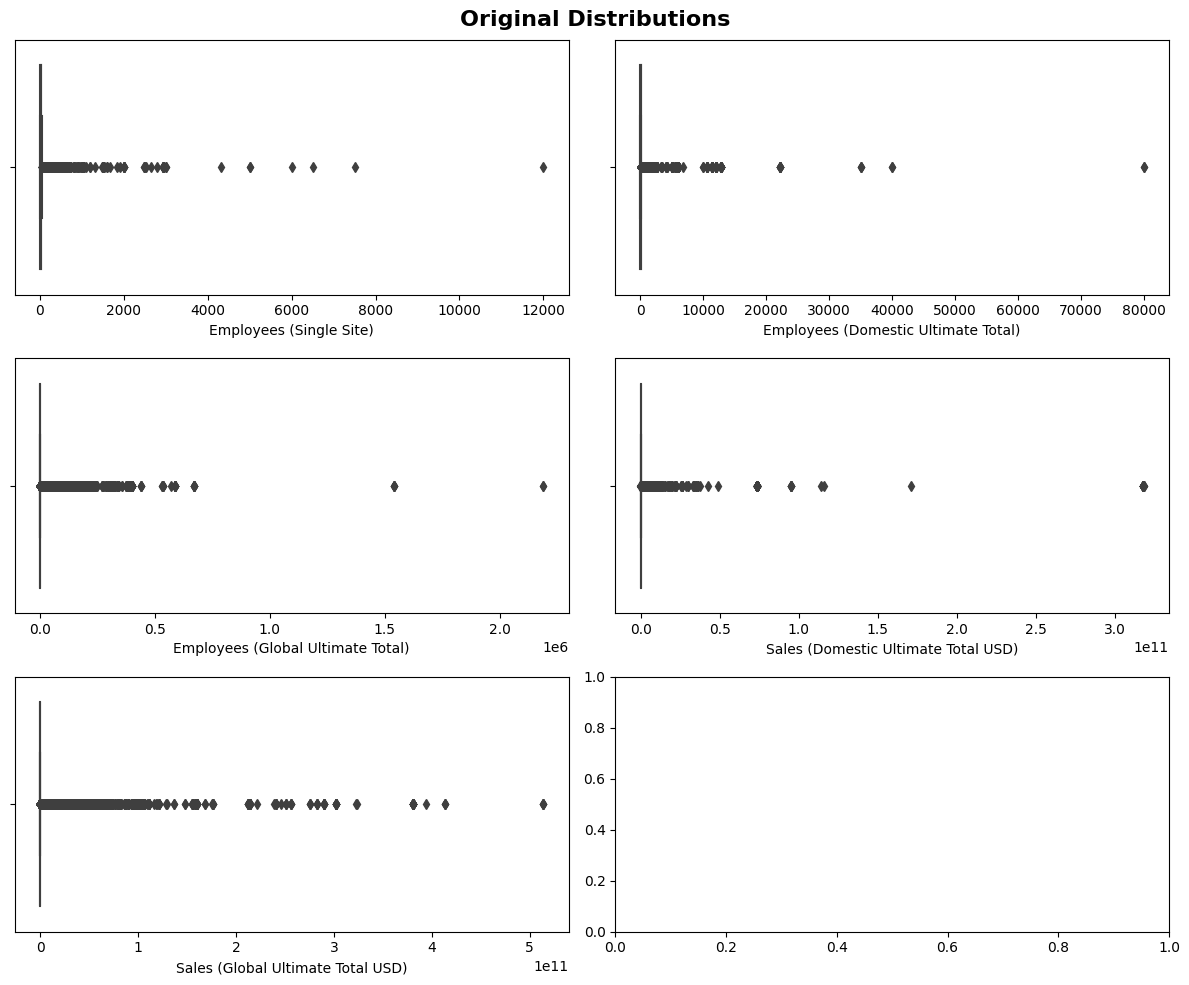

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.boxplot(data=df, x='Employees (Single Site)', ax=axes[0, 0])
sns.boxplot(data=df, x='Employees (Domestic Ultimate Total)', ax=axes[0, 1])
sns.boxplot(data=df, x='Employees (Global Ultimate Total)', ax=axes[1, 0])
sns.boxplot(data=df, x='Sales (Domestic Ultimate Total USD)', ax=axes[1, 1])
sns.boxplot(data=df, x='Sales (Global Ultimate Total USD)', ax=axes[2, 0])
fig.suptitle("Original Distributions", fontsize=16, fontweight='bold')
plt.tight_layout()
#plt.show()

#### Histogram

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_ol

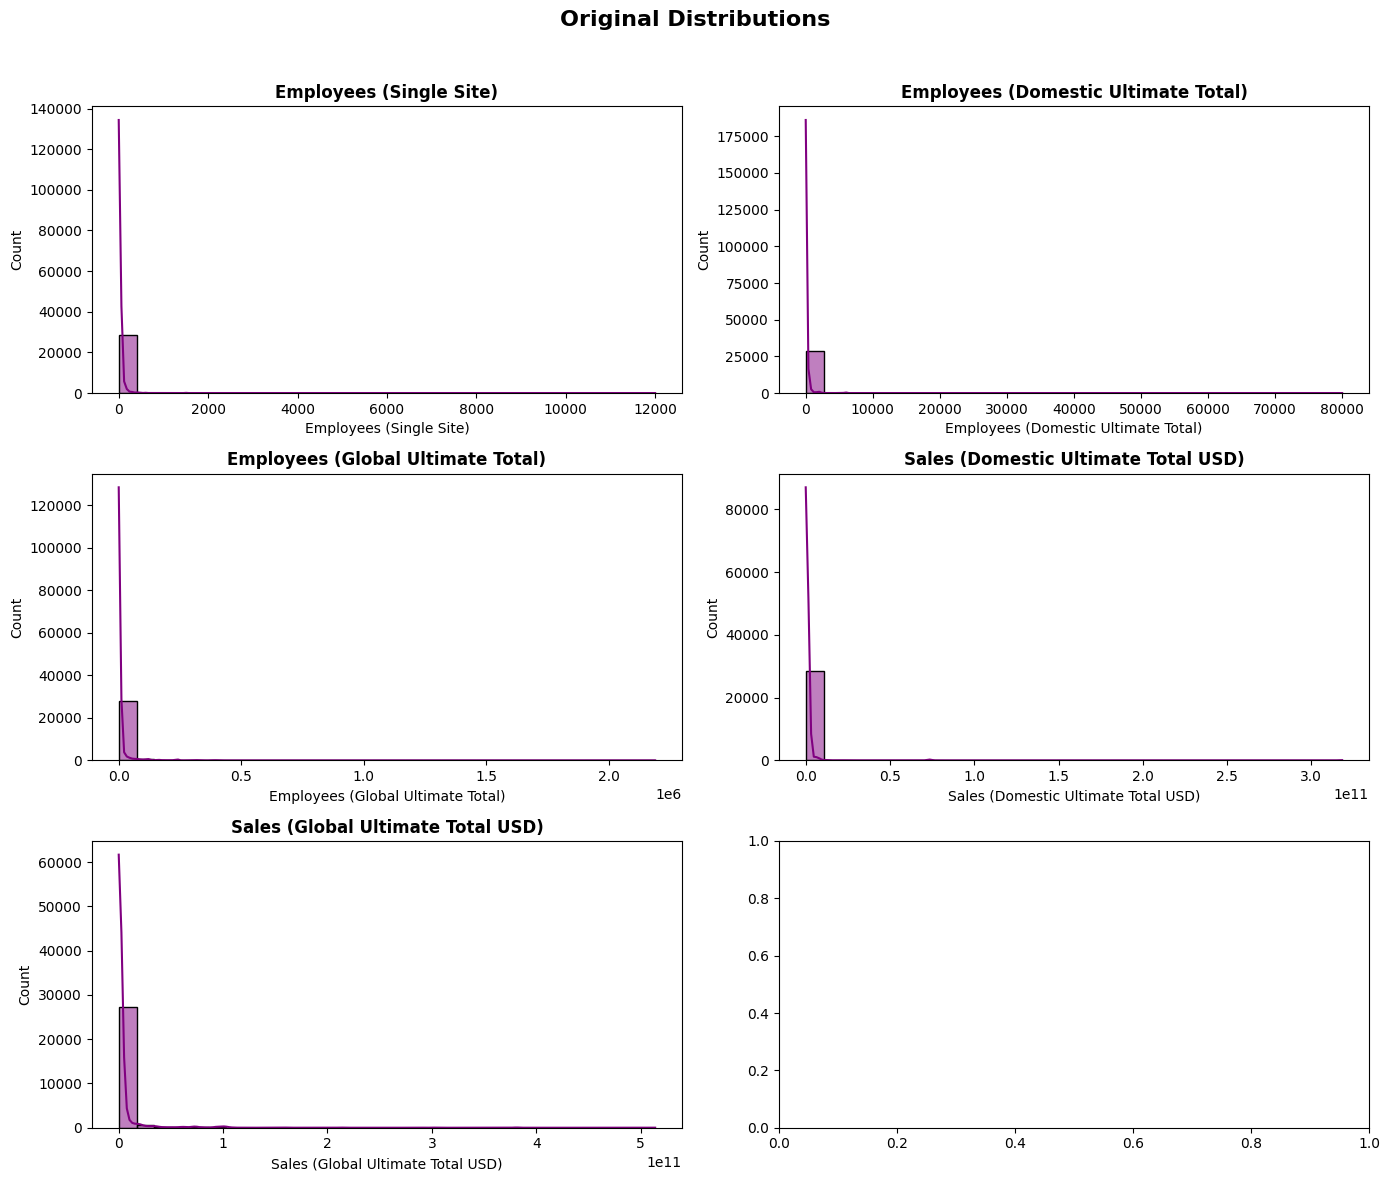

In [11]:
# Features to plot (Updated to include Log Employees)
original_features = [
    "Employees (Single Site)",
    "Employees (Domestic Ultimate Total)",
    "Employees (Global Ultimate Total)",
    "Sales (Domestic Ultimate Total USD)",
    "Sales (Global Ultimate Total USD)",
]

# Plot original features
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # Adjusted layout for original features
fig.suptitle("Original Distributions", fontsize=16, fontweight='bold')

axes = axes.flatten()
for i, feature in enumerate(original_features):
    if feature in df.columns:  # Ensure the feature exists in the dataset
        sns.histplot(df[feature], bins=30, kde=True, ax=axes[i], color="purple")
        axes[i].set_title(feature, fontsize=12, fontweight="bold")
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

Based on visual inspection of the distribution using boxplots and histograms, we observed that the values for **'Employees (Single Site)', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)', 'Sales (Domestic Ultimate Total USD)', and 'Sales (Global Ultimate Total USD)'** were **extremely left-skewed**. This skewness indicates that a few very large values (outliers) dominate the distribution, while most data points are concentrated near the lower end. 

To address this issue and improve the interpretability of the data, we applied a **log transformation** to these variables. The log transformation helps **normalize the distribution**, reduce the impact of extreme values, and make patterns in the data more evident for downstream modeling and analysis. This adjustment is particularly useful for improving the performance of machine learning models and ensuring better feature scaling.

### Log Transformation of Skewed Features (Employee and Sales Data)

The function ```transform_data(df)``` takes in the cleaned dataset and log-transforms all employee and sales data.

In [12]:
def transform_data(df):
    df['Employees (Single Site)'] = df['Employees (Single Site)'].clip(lower=1)
    df['log_Employees_Single'] = np.log1p(df['Employees (Single Site)'])

    df['Employees (Domestic Ultimate Total)'] = df['Employees (Domestic Ultimate Total)'].clip(lower=1)
    df['log_Employees_Domestic'] = np.log1p(df['Employees (Domestic Ultimate Total)'])

    df['Employees (Global Ultimate Total)'] = df['Employees (Global Ultimate Total)'].clip(lower=1)
    df['log_Employees_Global'] = np.log1p(df['Employees (Global Ultimate Total)'])

    df['Sales (Domestic Ultimate Total USD)'] = df['Sales (Domestic Ultimate Total USD)'].clip(lower=1)
    df['log_Sales_Domestic'] = np.log1p(df['Sales (Domestic Ultimate Total USD)'])

    df['Sales (Global Ultimate Total USD)'] = df['Sales (Global Ultimate Total USD)'].clip(lower=1)
    df['log_Sales_Global'] = np.log1p(df['Sales (Global Ultimate Total USD)'])
    return df
df = transform_data(df)

### Distribution of Data after Log Transformation

#### Boxplot

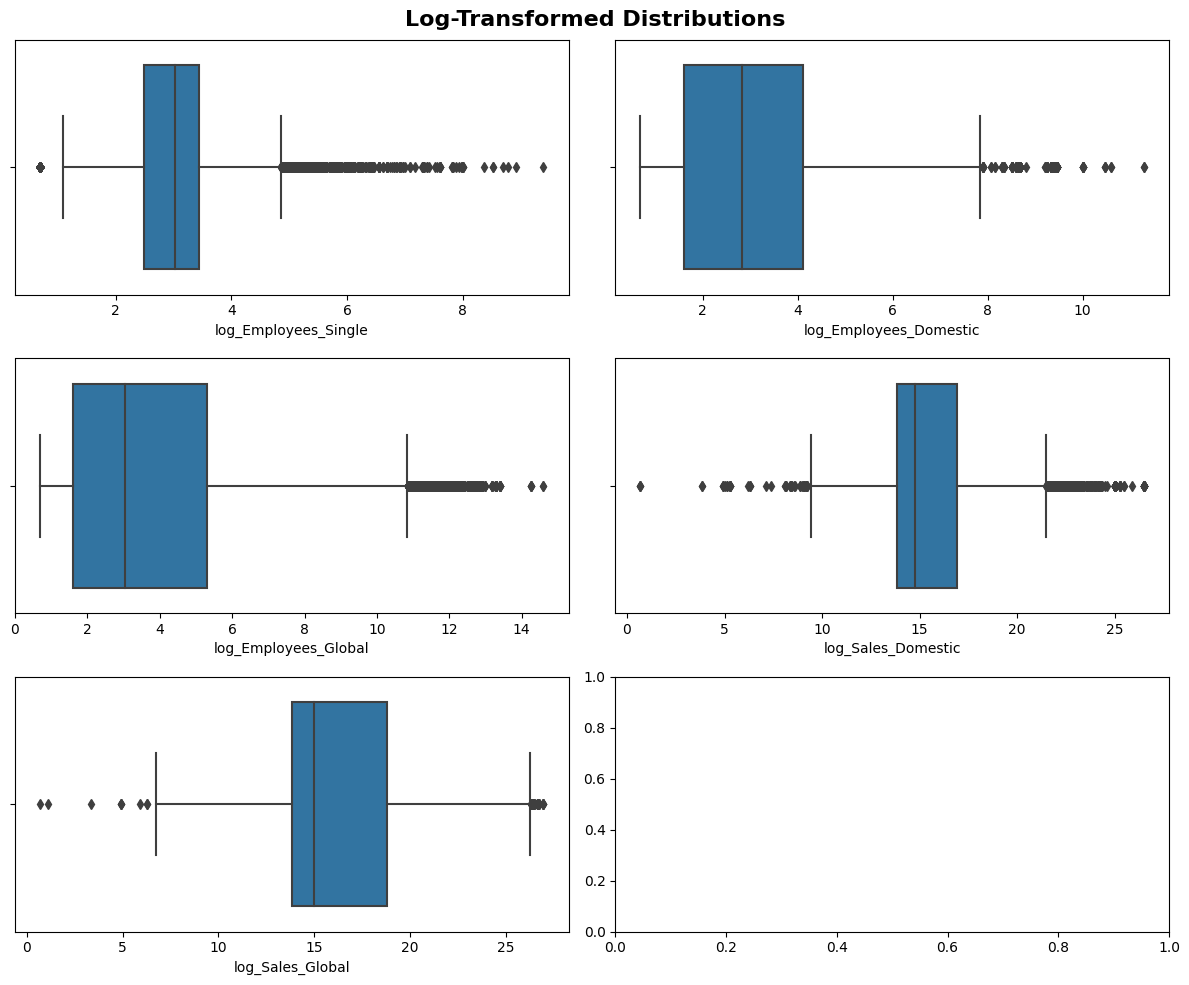

In [13]:

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.boxplot(data=df, x='log_Employees_Single', ax=axes[0, 0])
sns.boxplot(data=df, x='log_Employees_Domestic', ax=axes[0, 1])
sns.boxplot(data=df, x='log_Employees_Global', ax=axes[1, 0])
sns.boxplot(data=df, x='log_Sales_Domestic', ax=axes[1, 1])
sns.boxplot(data=df, x='log_Sales_Global', ax=axes[2, 0])
fig.suptitle("Log-Transformed Distributions", fontsize=16, fontweight='bold')

plt.tight_layout()
#plt.show()

#### Histogram

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_ol

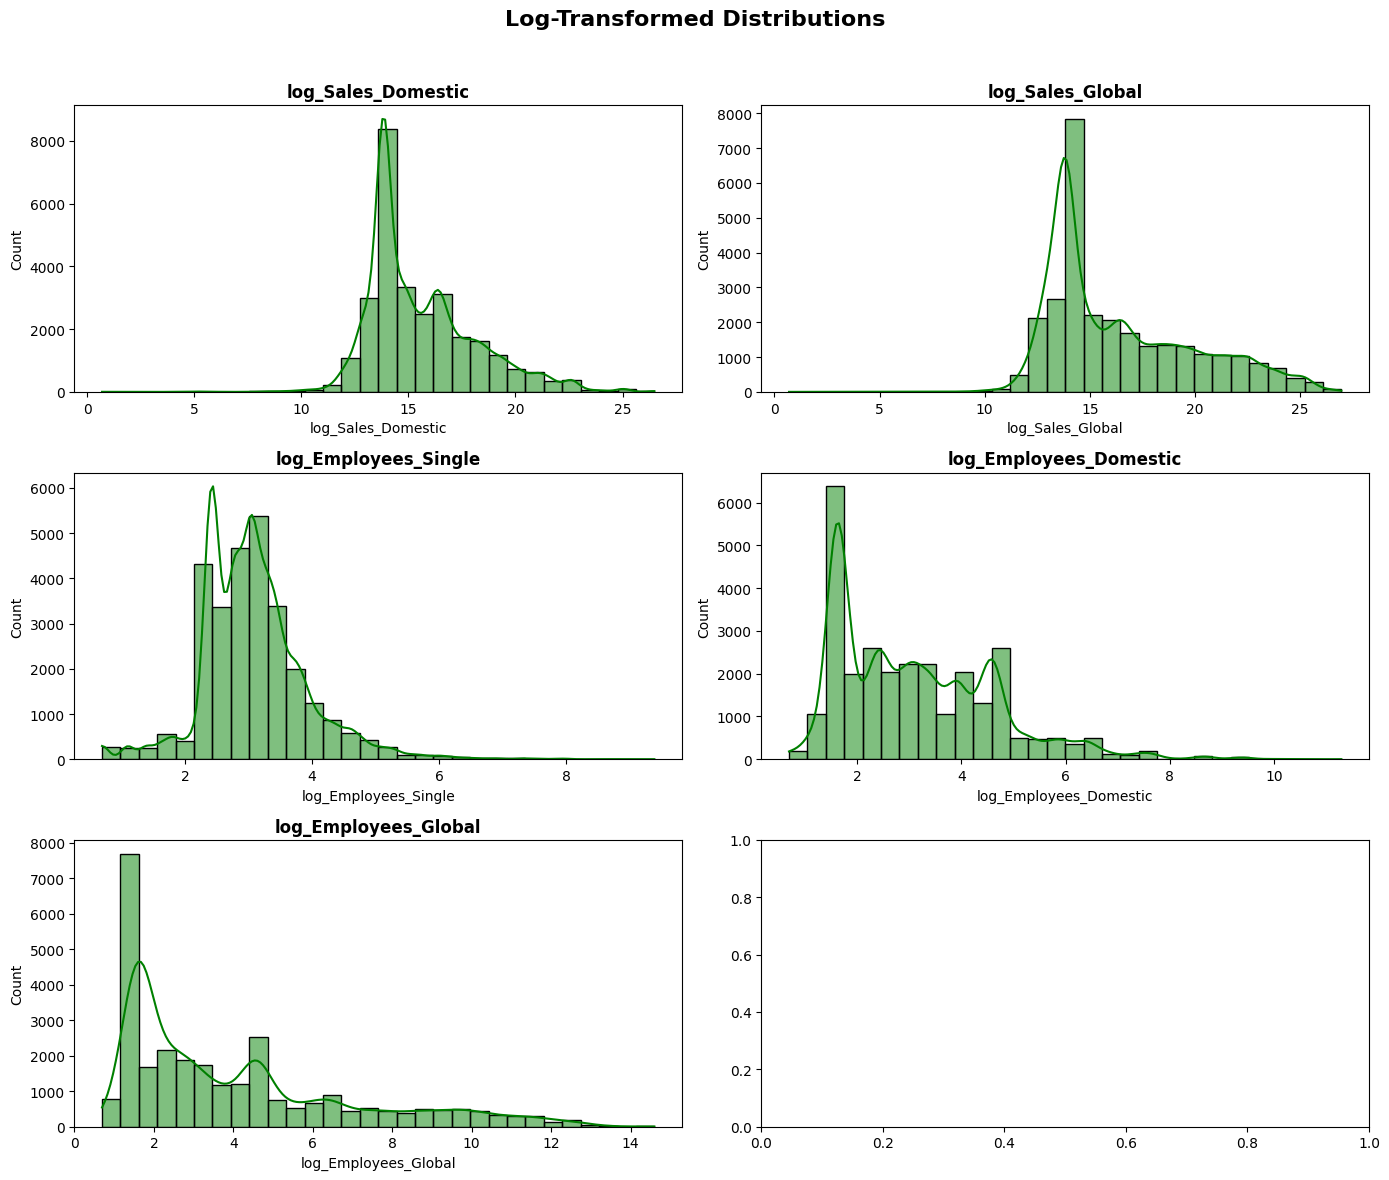

In [14]:
log_features = [
    "log_Sales_Domestic",
    "log_Sales_Global",
    "log_Employees_Single",
    "log_Employees_Domestic",
    "log_Employees_Global",
]

# Plot log-transformed features
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # Adjusted layout for log-transformed features
fig.suptitle("Log-Transformed Distributions", fontsize=16, fontweight='bold')

axes = axes.flatten()
for i, feature in enumerate(log_features):
    if feature in df.columns:  # Ensure the feature exists in the dataset
        sns.histplot(df[feature], bins=30, kde=True, ax=axes[i], color="green")
        axes[i].set_title(feature, fontsize=12, fontweight="bold")
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

# Data Visualisation

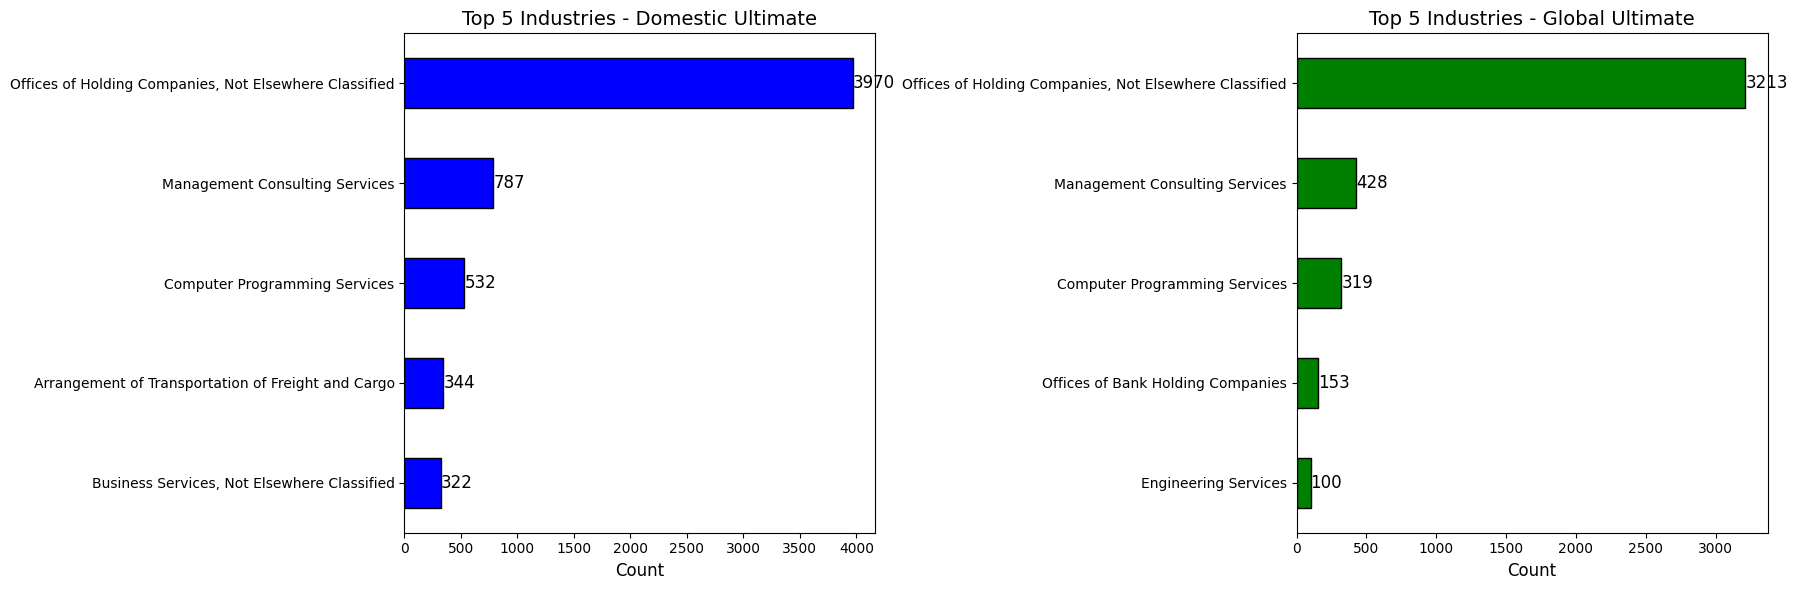

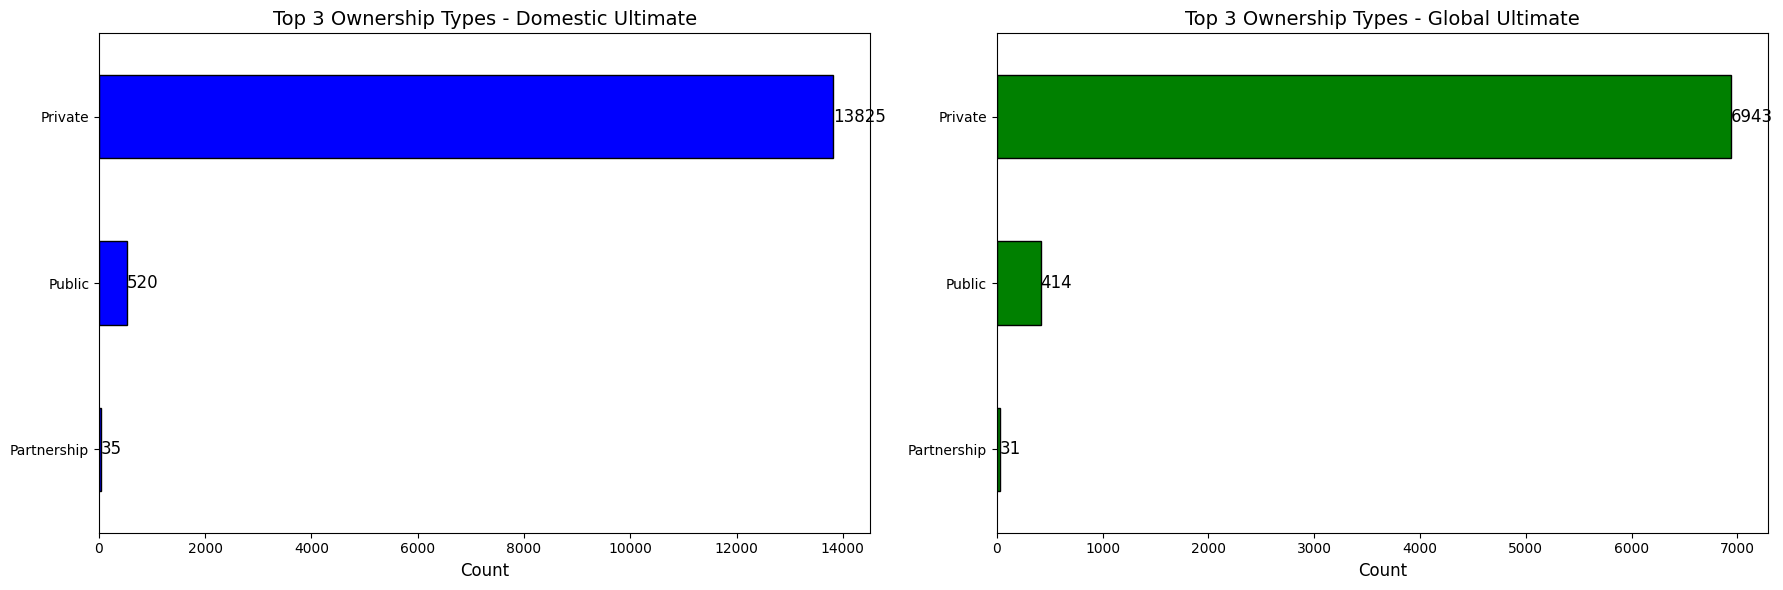

In [15]:
# Filter data for 'Domestic Ultimate' and 'Global Ultimate'
domestic_ultimate_df = df[df['Is Domestic Ultimate'] == True]
global_ultimate_df = df[df['Is Global Ultimate'] == True]

### GET TOP N MOST COMMON VALUES ###
def get_top_n_counts(series, n):
    return series.value_counts().nlargest(n)

# Get top 5 industries and top 3 ownership types for each category
top_industries_domestic = get_top_n_counts(domestic_ultimate_df['Industry'], 5)
top_industries_global = get_top_n_counts(global_ultimate_df['Industry'], 5)

top_ownership_domestic = get_top_n_counts(domestic_ultimate_df['Ownership Type'], 3)
top_ownership_global = get_top_n_counts(global_ultimate_df['Ownership Type'], 3)

### PLOT BAR CHARTS ###
def plot_horizontal_bar(ax, data, title, color):
    data.plot(kind='barh', ax=ax, color=color, edgecolor='black')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel('')
    ax.bar_label(ax.containers[0], fmt='%d', fontsize=12)  # Add labels on bars
    ax.invert_yaxis()  # Flip order to have highest value at the top

### PLOT INDUSTRIES ###
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

plot_horizontal_bar(ax[0], top_industries_domestic, 'Top 5 Industries - Domestic Ultimate', 'blue')
plot_horizontal_bar(ax[1], top_industries_global, 'Top 5 Industries - Global Ultimate', 'green')

plt.tight_layout()
plt.show()

### PLOT OWNERSHIP TYPES ###
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

plot_horizontal_bar(ax[0], top_ownership_domestic, 'Top 3 Ownership Types - Domestic Ultimate', 'blue')
plot_horizontal_bar(ax[1], top_ownership_global, 'Top 3 Ownership Types - Global Ultimate', 'green')

plt.tight_layout()
plt.show()


# Feature Selection

### Correlation Matrix

The correlation matrix is used to analyse the relationships between features and the target variables. This helps us identify highly correlated features, which can introduce multicollinearity and redundancy in the model. By removing features that are highly correlated with each other and those with low relevance to the target variables, we improve model interpretability, reduce overfitting, and enhance predictive performance.

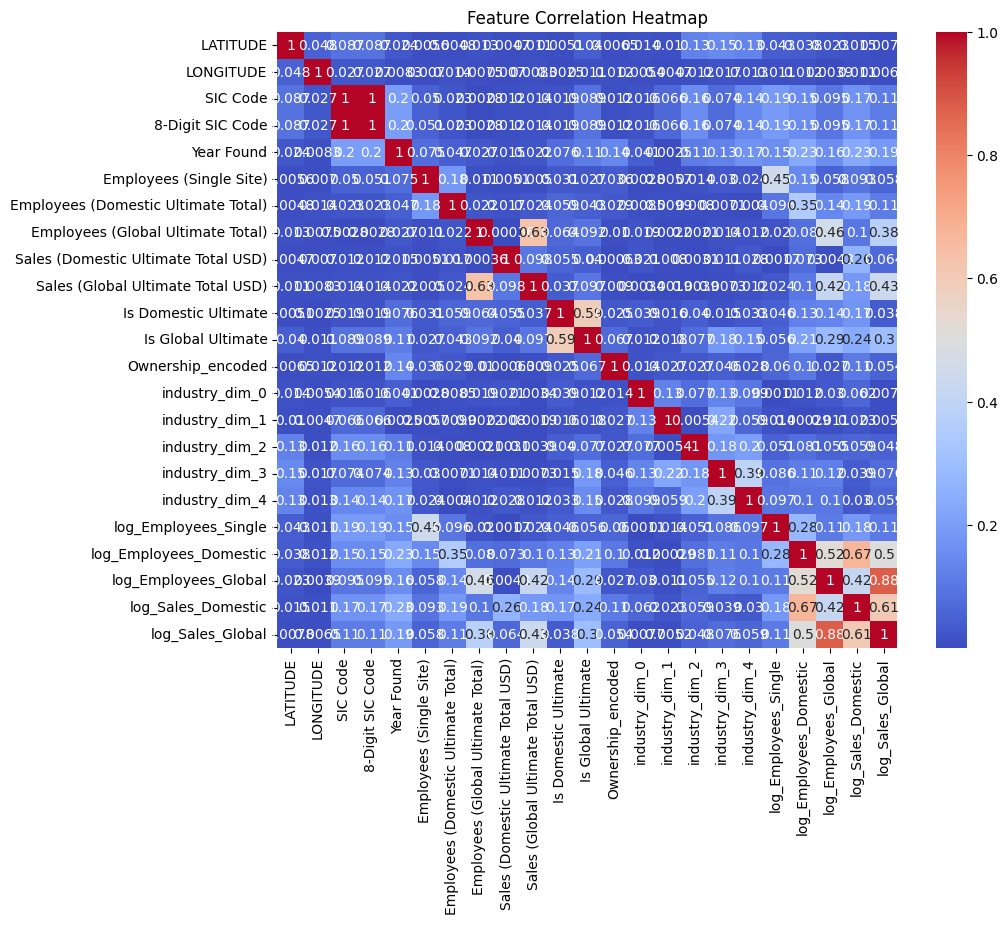

Features to Remove: {'Sales (Global Ultimate Total USD)', 'log_Employees_Global', 'log_Sales_Global', '8-Digit SIC Code', 'log_Sales_Domestic', 'Is Global Ultimate'}
Final Selected Features: Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Year Found',
       'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)', 'Is Domestic Ultimate',
       'Ownership_encoded', 'industry_dim_0', 'industry_dim_1',
       'industry_dim_2', 'industry_dim_3', 'industry_dim_4',
       'log_Employees_Single', 'log_Employees_Domestic'],
      dtype='object')


In [16]:
df_corr_matrix = df.drop(columns=["Industry", "Ownership Type"])

# Compute correlation matrix
corr_matrix = df_corr_matrix.corr().abs()

# Create a mask for upper triangle (since correlation matrix is symmetric)
mask = np.triu(np.ones(corr_matrix.shape), k=1)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Set correlation threshold
corr_threshold = 0.5

# Find highly correlated features
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_threshold:
            colname = corr_matrix.columns[i]  # Feature to remove
            high_corr_features.add(colname)
print("Features to Remove:", high_corr_features)

# Drop correlated features
corr_selected_features = df_corr_matrix.drop(columns=high_corr_features)
print("Final Selected Features:", corr_selected_features.columns)

### Lasso Regression

Lasso regression is used for feature selection and regularisation by shrinking less important feature coefficients to zero, effectively removing them from the model. This helps in identifying the least important features, and eliminating them. Ultimately, lasso regression improves interpretability and reduces overfitting. It is applied to the continuous numerical variables.

In [17]:
# Define features and target
X = df.drop(columns=['Is Domestic Ultimate', 'Is Global Ultimate', "Industry", "Ownership Type"])
y_domestic = df['Is Domestic Ultimate']
y_global = df['Is Global Ultimate']

# 80-20 split for Domestic Ultimate classification
X_train_dom, X_test_dom, y_train_dom, y_test_dom = train_test_split(X, y_domestic, test_size=0.2, random_state=42)

# 80-20 split for Global Ultimate classification
X_train_glob, X_test_glob, y_train_glob, y_test_glob = train_test_split(X, y_global, test_size=0.2, random_state=42)

# 70-10 split for the 80% for Domestic Ultimate
X_train_dom, X_val_dom, y_train_dom, y_val_dom = train_test_split(X_train_dom, y_train_dom, test_size=0.125, random_state=42)

# 70-10 split for the 80% for Global Ultimate
X_train_glob, X_val_glob, y_train_glob, y_val_glob = train_test_split(X_train_glob, y_train_glob, test_size=0.125, random_state=42)

scaler = StandardScaler()

# Scale Domestic Ultimate data
X_train_dom_scaled = scaler.fit_transform(X_train_dom)
X_test_dom_scaled = scaler.transform(X_test_dom)

# Scale Global Ultimate data
X_train_glob_scaled = scaler.fit_transform(X_train_glob)
X_test_glob_scaled = scaler.transform(X_test_glob)

# Train Lasso for Domestic Ultimate classification
lasso_domestic = LassoCV(cv=5, random_state=42)
lasso_domestic.fit(X_train_dom_scaled, y_train_dom)

# Get selected features for Domestic Ultimate
lasso_selected_features_domestic = np.array(X_train_dom.columns)[lasso_domestic.coef_ == 0]
print("Selected Features to be Removed for Domestic Ultimate:", lasso_selected_features_domestic)

# Train Lasso for Global Ultimate classification
lasso_global = LassoCV(cv=5, random_state=42)
lasso_global.fit(X_train_glob_scaled, y_train_glob)

# Get selected features for Global Ultimate
lasso_selected_features_global = np.array(X_train_glob.columns)[lasso_global.coef_ == 0]
print("Selected Features to be Removed for Global Ultimate:", lasso_selected_features_global)

Selected Features to be Removed for Domestic Ultimate: ['LONGITUDE' 'SIC Code']
Selected Features to be Removed for Global Ultimate: ['SIC Code' 'industry_dim_0']


# Feature Engineering

### New Features Added 
#### Employee_Ratio = log_Employees_Domestic / log_Employees_Global

A high ratio (≫1) suggests a large international workforce, making it more likely that the company is a Global Ultimate.
A low ratio (≈0) suggests that the company mostly operates domestically, making it more likely to be a Domestic Ultimate or a subsidiary.

#### Sales_Ratio = log_Sales_Domestic / log_Sales_Global

A high ratio (≫1) means that most of the company's revenue comes from international markets, indicating a Global Ultimate.
A low ratio (≈0) means that most sales happen in the home country, suggesting that the company is either a Domestic Ultimate or a subsidiary.

We decided to use the log transformed values to compute the ratio because it compresses large values, making the ratio more balanced and interpretable. These features compare domestic vs. global values, providing insights into relative scale differences rather than absolute numbers. Instead of just using absolute employee or sales counts, these ratios help measure the proportion of domestic to global. Ratio-based features help normalise the data and provide a more structured comparison.

The function ```add_feature(df)``` takes in the cleaned dataset and adds the new features to the dataset.

In [18]:
def add_feature(df):
    df['Employee_Ratio'] = df['log_Employees_Domestic'] / df['log_Employees_Global']
    df['Sales_Ratio'] = df['log_Sales_Domestic']/ df['log_Sales_Global']
    return df

df = add_feature(df)

# XGBoost Tree-Based Model

## Feature Importance

Between two tree-based models XGBoost and Random Forest, we proceeded with XGBoost due to its speed, accuracy, and ability to handle complex data structures efficiently. Boosting corrects errors from previous trees, making XGBoost less biased and hence more accurate. Random Forest treats all trees equally, while XGBoost focuses more on hard-to-predict samples. XGBoost is much faster since it uses parallel computation and GPU acceleration. Additionally, XGBoost has built-in regularsation, preventing overfitting. 

Two separate models were trained:
1. XGBoost model for Global Ultimate classification
2. XGBoost model for Domestic Ultimate classification

Feature importance scores were extracted to identify the top 10 most relevant features for both classification tasks.

The function ```xgb_features(df)``` takes in the cleaned dataset and extracts top features for Domestic and Global Ultimate using XGBoost feature importance. It also visualises the top 10 features in respective bar charts.

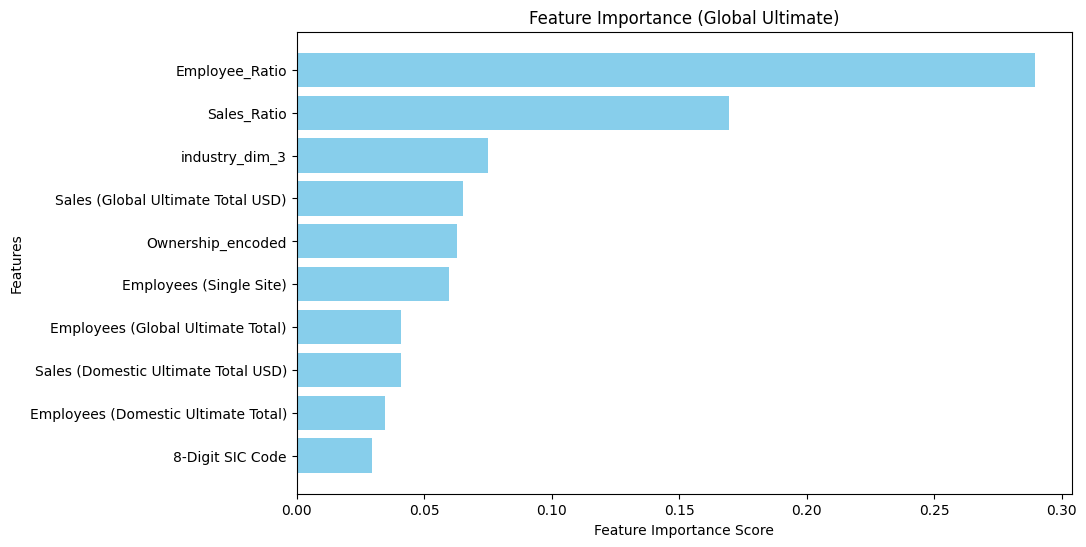

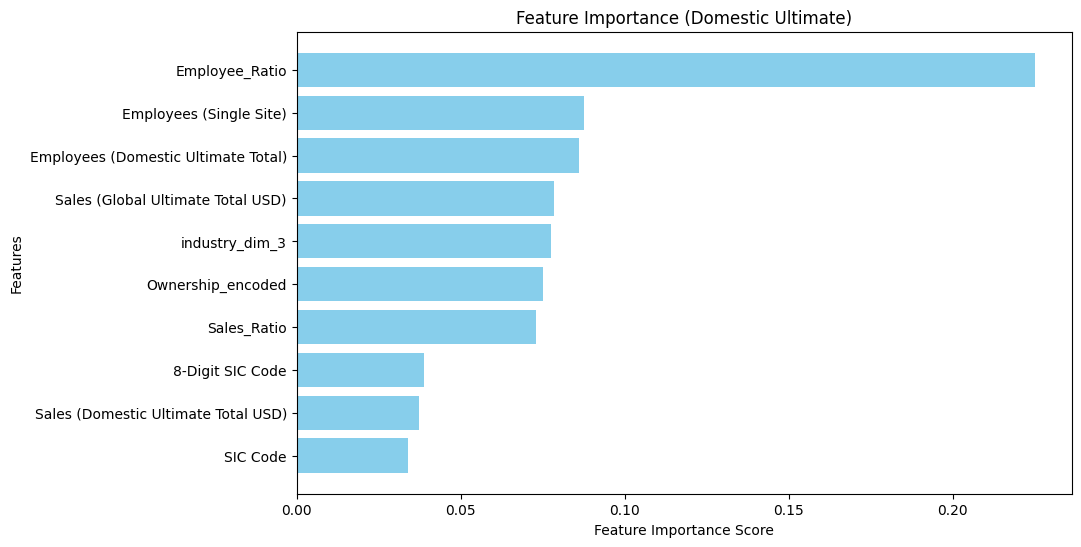

" Top features for Global Ultimate:  'Employee_Ratio' 'Sales_Ratio' 'industry_dim_3'\n 'Sales (Global Ultimate Total USD)' 'Ownership_encoded'\n 'Employees (Single Site)' 'Employees (Global Ultimate Total)'\n 'Sales (Domestic Ultimate Total USD)'\n 'Employees (Domestic Ultimate Total)' '8-Digit SIC Code'\nTop features for Domestic Ultimate:  'Employee_Ratio' 'Employees (Single Site)'\n 'Employees (Domestic Ultimate Total)' 'Sales (Global Ultimate Total USD)'\n 'industry_dim_3' 'Ownership_encoded' 'Sales_Ratio' '8-Digit SIC Code'\n 'Sales (Domestic Ultimate Total USD)' 'SIC Code' "

In [19]:
def plot_feature_importance(feature_importance_df, title):
    """ Helper function to plot top 10 features """
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(title)
    plt.gca().invert_yaxis()  # Reverse order for better readability
    plt.show()

def xgb_features(df):
    """ Extracts top features for Domestic and Global Ultimate using XGBoost feature importance. """
    
    # Drop categorical variables
    df = df.drop(columns=["Industry", "Ownership Type"], errors='ignore')

    # Define features and targets
    X = df.drop(columns=['Is Domestic Ultimate', 'Is Global Ultimate'])
    y_domestic = df['Is Domestic Ultimate']
    y_global = df['Is Global Ultimate']

    # Train XGBoost model for Global Ultimate
    model_global = xgb.XGBClassifier()
    model_global.fit(X, y_global)

    # Extract feature importance for Global Ultimate
    feature_importance_df_global = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model_global.feature_importances_
    }).sort_values(by="Importance", ascending=False).head(10)

    # Plot top 10 features for Global Ultimate
    plot_feature_importance(feature_importance_df_global, "Feature Importance (Global Ultimate)")

    # Train XGBoost model for Domestic Ultimate
    model_domestic = xgb.XGBClassifier()
    model_domestic.fit(X, y_domestic)

    # Extract feature importance for Domestic Ultimate
    feature_importance_df_domestic = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model_domestic.feature_importances_
    }).sort_values(by="Importance", ascending=False).head(10)

    # Plot top 10 features for Domestic Ultimate
    plot_feature_importance(feature_importance_df_domestic, "Feature Importance (Domestic Ultimate)")

    # Get top 10 features
    top_features_global = feature_importance_df_global['Feature'].values
    top_features_domestic = feature_importance_df_domestic['Feature'].values

    return df, top_features_global, top_features_domestic

# Call the function
df, top_features_global, top_features_domestic = xgb_features(df)

""" Top features for Global Ultimate:  'Employee_Ratio' 'Sales_Ratio' 'industry_dim_3'
 'Sales (Global Ultimate Total USD)' 'Ownership_encoded'
 'Employees (Single Site)' 'Employees (Global Ultimate Total)'
 'Sales (Domestic Ultimate Total USD)'
 'Employees (Domestic Ultimate Total)' '8-Digit SIC Code'
Top features for Domestic Ultimate:  'Employee_Ratio' 'Employees (Single Site)'
 'Employees (Domestic Ultimate Total)' 'Sales (Global Ultimate Total USD)'
 'industry_dim_3' 'Ownership_encoded' 'Sales_Ratio' '8-Digit SIC Code'
 'Sales (Domestic Ultimate Total USD)' 'SIC Code' """

The Global feature importance plot shows the top 10 most influential features used by the XGBoost model to predict whether a company is a Global Ultimate entity.
From this, we can tell that the employee and sales ratios are the most important factors. Industry classification and ownership structure play a role. Absolute employee and sales numbers still contribute but are less important than ratios.
However, the model prioritises relative measures (ratios) over absolute values when determining if a company is Global Ultimate. 

The Domestic feature importance plot illustrates the top 10 most influential features used by the XGBoost model to predict whether a company is a Domestic Ultimate entity.
From this, Employee_Ratio is the most influential feature. Total Domestic Employees and Employees at a Single Site also rank highly.

Additionally, Domestic sales contribute to classification but do not outweigh workforce-related indicators.
These visualisations helped in determining which features were most impactful for the classification.

## XGBoost Model Training 

#### Train-Test-Validation Splitting
To ensure robust model performance, the dataset was split into training, validation, and test sets.
1. Train-Test Split (80-20)
The dataset was split into 80% training and 20% testing. This ensures that the model learns from 80% of the data while keeping 20% unseen for final evaluation. 
Stratified sampling was used to maintain the same proportion of Domestic Ultimate and Global Ultimate companies in the training and test sets.
2. Train-Validation Split (Within Training Set)
The 80% training data was further split into train (70%) and validation (10%).
The validation set was used for hyperparameter tuning (Optuna).
This ensures that hyperparameters are optimized on a separate validation set, preventing overfitting.

#### Handling Imbalanced Data with SMOTE

Since classification tasks often involve imbalanced classes, SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training data.
This generates synthetic minority class samples, ensuring that both classes have equal representation in the training data.
This improves the model's ability to classify the underrepresented class (e.g., Domestic Ultimate companies).

#### Hyperparameter Tuning using Optuna
Optuna is a hyperparameter optimisation framework that employs an adaptive search strategy to efficiently explore the hyperparameter space. Unlike grid search, which tries all possible combinations, or random search, which selects combinations at random, Optuna uses a Bayesian optimisation approach that intelligently learns from past trials to find the most promising hyperparameter values.
This function selects the best combination of hyperparameters by maximising model accuracy. 

#### Model Training
After tuning, the best hyperparameters were used to train the final model.
The model was trained on SMOTE-balanced training data and evaluated on the validation set.
The final test dataset was used to evaluate model performance.


The function ```xgb_model(df)``` takes in the cleaned dataset and conducts train-test split, feature scaling, SMOTE, Hyperparameter optimization with feature selection before training the XGBoost model. It returns the models (model_global, model_domestic), selected features, and test features.

In [20]:
def xgb_model(df):
    X = df.drop(columns=['Is Domestic Ultimate', 'Is Global Ultimate'])
    y_domestic = df['Is Domestic Ultimate']
    y_global = df['Is Global Ultimate']
    
    # Step 1: Initial Split (Train-Test) for BOTH Targets Together
    X_train, X_test, y_train_domestic, y_test_domestic, y_train_global, y_test_global = train_test_split(
        X, y_domestic, y_global,
        test_size=0.2, random_state=42, stratify=y_domestic  # Assuming y_domestic for stratification
    )

    # Step 2: Validation Split (Train-Validation) for BOTH Targets Together
    X_train, X_val, y_train_domestic, y_val_domestic, y_train_global, y_val_global = train_test_split(
        X_train, y_train_domestic, y_train_global,
        test_size=0.125, random_state=42, stratify=y_train_domestic
    )

    # Step 3: Feature Scaling
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE **only on the training set**
    smote = SMOTE(random_state=42)
    X_train_smote_domestic, y_train_smote_domestic = smote.fit_resample(X_train_scaled, y_train_domestic)
    X_train_smote_global, y_train_smote_global = smote.fit_resample(X_train_scaled, y_train_global)

    # Feature Selection for validation and test data (after scaling)
    X_val_selected_domestic = X_val_scaled[:, [X.columns.get_loc(f) for f in top_features_domestic]]
    X_test_selected_domestic = X_test_scaled[:, [X.columns.get_loc(f) for f in top_features_domestic]]
    X_val_selected_global = X_val_scaled[:, [X.columns.get_loc(f) for f in top_features_global]]
    X_test_selected_global = X_test_scaled[:, [X.columns.get_loc(f) for f in top_features_global]]

    # Optuna objective function with feature selection
    def objective(trial, X_train, y_train, top_features):
        # Use only the top 10 features selected based on importance
        X_train_selected = X_train[:, [X.columns.get_loc(f) for f in top_features]]

        param = {
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1, log=True),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 5)
        }

        model = xgb.XGBClassifier(**param)
        model.fit(X_train_selected, y_train)
        
        y_pred = model.predict(X_train_selected)
        accuracy = accuracy_score(y_train, y_pred)
        return accuracy

    # Hyperparameter optimization for Domestic Ultimate
    study_domestic = optuna.create_study(direction='maximize')
    study_domestic.optimize(lambda trial: objective(trial, X_train_smote_domestic, y_train_smote_domestic, top_features_domestic), n_trials=100)

    # Get the best parameters for Domestic Ultimate
    best_params_domestic = study_domestic.best_params
    print(f"Best parameters for Domestic Ultimate: {best_params_domestic}")

    # Train model for Domestic Ultimate
    X_train_selected_domestic = X_train_smote_domestic[:, [X.columns.get_loc(f) for f in top_features_domestic]]
    model_domestic = xgb.XGBClassifier(**best_params_domestic)
    model_domestic.fit(X_train_selected_domestic, y_train_smote_domestic,
                    eval_set=[(X_val_selected_domestic, y_val_domestic)], 
                    verbose=True)

    study_global = optuna.create_study(direction='maximize')
    study_global.optimize(lambda trial: objective(trial, X_train_smote_global, y_train_smote_global, top_features_global), n_trials=100)

    # Get the best parameters for Global Ultimate
    best_params_global = study_global.best_params
    print(f"Best parameters for Global Ultimate: {best_params_global}")

    # Train model for Global Ultimate
    X_train_selected_global = X_train_smote_global[:, [X.columns.get_loc(f) for f in top_features_global]]
    model_global = xgb.XGBClassifier(**best_params_global)
    model_global.fit(X_train_selected_global, y_train_smote_global, 
                    eval_set=[(X_val_selected_global, y_val_global)], 
                    verbose=True)
    
    # Test model with test set
    y_pred_global = model_global.predict(X_test_selected_global)
    y_pred_domestic = model_domestic.predict(X_test_selected_domestic)
    global_test_accuracy = accuracy_score(y_test_global, y_pred_global)
    domestic_test_accuracy = accuracy_score(y_test_domestic, y_pred_domestic)

    print("'Is Global Ultimate Prediction' Results")
    print(classification_report(y_test_global, y_pred_global))
    print("Accuracy:", global_test_accuracy)

    print("'Is Domestic Ultimate' Prediction Results")
    print(classification_report(y_test_domestic, y_pred_domestic))
    print("Accuracy:", domestic_test_accuracy)
    
    """ 'Is Global Ultimate' Prediction Results
                precision    recall  f1-score   support

            0       0.96      0.92      0.94      4267
            1       0.80      0.88      0.84      1460

        accuracy                           0.91      5727
    macro avg       0.88      0.90      0.89      5727
    weighted avg       0.92      0.91      0.92      5727

    Accuracy: 0.9137419242186136
    'Is Domestic Ultimate' Prediction Results
                precision    recall  f1-score   support

            0       0.94      0.81      0.87      2849
            1       0.84      0.95      0.89      2878

        accuracy                           0.88      5727
    macro avg       0.89      0.88      0.88      5727
    weighted avg       0.89      0.88      0.88      5727

    Accuracy: 0.8817880216518247 """
   
    return model_global, model_domestic, y_test_global, y_test_domestic

model_global, model_domestic, y_test_global, y_test_domestic = xgb_model(df)

[I 2025-02-06 22:18:24,920] A new study created in memory with name: no-name-3c73aaa3-9141-4a69-b5ed-ed20a7c902af
/var/folders/x1/p2dk3vss0fl3mhn_3cftdjy80000gn/T/ipykernel_59963/1362113772.py:50: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 5)
[I 2025-02-06 22:18:25,566] Trial 0 finished with value: 0.8210066514444555 and parameters: {'max_depth': 5, 'n_estimators': 274, 'learning_rate': 0.021544669855586604, 'subsample': 0.8421221535543372, 'colsample_bytree': 0.6569693463080647, 'gamma': 3.9189413731780602, 'min_child_weight': 2, 'scale_pos_weight': 2.62166473126786}. Best is trial 0 with value: 0.8210066514444555.
/var/folders/x1/p2dk3vss0fl3mhn_3cftdjy80000gn/T/ipykernel_59963/1362113772.py:50: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will 

Best parameters for Domestic Ultimate: {'max_depth': 10, 'n_estimators': 263, 'learning_rate': 0.09979654072652677, 'subsample': 0.6429896402832662, 'colsample_bytree': 0.7003731726428157, 'gamma': 0.5682259785969451, 'min_child_weight': 3, 'scale_pos_weight': 2.263480134490025}
[0]	validation_0-logloss:0.70347
[1]	validation_0-logloss:0.66899
[2]	validation_0-logloss:0.63839
[3]	validation_0-logloss:0.61482
[4]	validation_0-logloss:0.58228
[5]	validation_0-logloss:0.55362
[6]	validation_0-logloss:0.53673
[7]	validation_0-logloss:0.51788
[8]	validation_0-logloss:0.50455
[9]	validation_0-logloss:0.48907
[10]	validation_0-logloss:0.47875
[11]	validation_0-logloss:0.46479
[12]	validation_0-logloss:0.45062
[13]	validation_0-logloss:0.43795
[14]	validation_0-logloss:0.42687
[15]	validation_0-logloss:0.41805
[16]	validation_0-logloss:0.41187
[17]	validation_0-logloss:0.40610
[18]	validation_0-logloss:0.40193
[19]	validation_0-logloss:0.39814
[20]	validation_0-logloss:0.39019
[21]	validation_

[I 2025-02-06 22:19:32,624] A new study created in memory with name: no-name-8a0109eb-b4af-4153-a45f-ce93eee62ae3
/var/folders/x1/p2dk3vss0fl3mhn_3cftdjy80000gn/T/ipykernel_59963/1362113772.py:50: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 5)
[I 2025-02-06 22:19:33,152] Trial 0 finished with value: 0.5 and parameters: {'max_depth': 6, 'n_estimators': 233, 'learning_rate': 1.8442452659776474e-05, 'subsample': 0.6216964140079365, 'colsample_bytree': 0.8995879784040295, 'gamma': 0.5108156184422064, 'min_child_weight': 4, 'scale_pos_weight': 2.560483414820851}. Best is trial 0 with value: 0.5.
/var/folders/x1/p2dk3vss0fl3mhn_3cftdjy80000gn/T/ipykernel_59963/1362113772.py:50: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Best parameters for Global Ultimate: {'max_depth': 10, 'n_estimators': 261, 'learning_rate': 0.06285873279867937, 'subsample': 0.8459170810609616, 'colsample_bytree': 0.7895949473062035, 'gamma': 0.5855768617504559, 'min_child_weight': 3, 'scale_pos_weight': 1.1556021683736}
[0]	validation_0-logloss:0.68860
[1]	validation_0-logloss:0.65198
[2]	validation_0-logloss:0.61970
[3]	validation_0-logloss:0.59074
[4]	validation_0-logloss:0.56609
[5]	validation_0-logloss:0.54253
[6]	validation_0-logloss:0.52126
[7]	validation_0-logloss:0.50973
[8]	validation_0-logloss:0.49142
[9]	validation_0-logloss:0.47750
[10]	validation_0-logloss:0.46202
[11]	validation_0-logloss:0.44808
[12]	validation_0-logloss:0.43643
[13]	validation_0-logloss:0.42826
[14]	validation_0-logloss:0.41765
[15]	validation_0-logloss:0.40763
[16]	validation_0-logloss:0.39749
[17]	validation_0-logloss:0.38847
[18]	validation_0-logloss:0.38069
[19]	validation_0-logloss:0.37338
[20]	validation_0-logloss:0.36856
[21]	validation_0-lo

# Testing Hidden Data

## Prepare Hidden Data for Model

The ```clean_data``` function is used to apply a trained model to a test dataset. It handles preprocessing steps such as data cleaning.

The test dataset should be in a CSV file format.

Use the function by replacing HIDDEN_DATA_PATH with the file path to your test dataset.



In [21]:
def clean_data(HIDDEN_DATA_PATH):
    hidden_df = pd.read_csv(HIDDEN_DATA_PATH)
    hidden_df = convert_data(hidden_df)
    hidden_df = drop_columns(hidden_df)
    hidden_df = drop_NA(hidden_df)
    hidden_df = impute_data(hidden_df)
    hidden_df = transform_data(hidden_df)
    hidden_df = add_feature(hidden_df)
    y_domestic = hidden_df['Is Domestic Ultimate']
    y_global = hidden_df['Is Global Ultimate']
    X = hidden_df.drop(columns=['Is Domestic Ultimate', 'Is Global Ultimate', "Industry", "Ownership Type"])
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    X_selected_domestic = X_scaled[:, [X.columns.get_loc(f) for f in top_features_domestic]]
    X_selected_global = X_scaled[:, [X.columns.get_loc(f) for f in top_features_global]]
    
    return X_selected_domestic, X_selected_global, y_global, y_domestic


Replace HIDDEN_DATA_PATH with path of hidden test data below

In [22]:
# Sample Method Invocation
HIDDEN_DATA_PATH = "/Users/charmaineneo/Downloads/Champions_Group_2025/Champions_Group_2025.csv"
X_selected_domestic, X_selected_global, y_global, y_domestic = clean_data(HIDDEN_DATA_PATH)

/var/folders/x1/p2dk3vss0fl3mhn_3cftdjy80000gn/T/ipykernel_59963/3814699513.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  columns_to_drop = missing_df[missing_percentage == 100].index


Percentage of Missing Values in Import/Export Status: 77.34%
Percentage of Missing Values in Fiscal Year End: 76.91%


## Model Prediction Results (on hidden data)

The ```test_model``` function is used to apply a trained model to a test dataset. 
It takes in the models predicting the target variables, selected features and target values from the hidden data set, and tests the model prediction against the true values. It prints the classification report and accuracy score of the trained model against the hidden data set.


In [23]:
def test_model(model_global, model_domestic, X_selected_domestic, X_selected_global, y_global, y_domestic):
    
    y_pred_global = model_global.predict(X_selected_global)
    y_pred_domestic = model_domestic.predict(X_selected_domestic)
    global_accuracy = accuracy_score(y_global, y_pred_global)
    domestic_accuracy = accuracy_score(y_domestic, y_pred_domestic)

    print("'Is Global Ultimate' Prediction Results")
    print(classification_report(y_global, y_pred_global))
    print("Accuracy:", global_accuracy)

    print("'Is Domestic Ultimate' Prediction Results")
    print(classification_report(y_domestic, y_pred_domestic))
    print("Accuracy:", domestic_accuracy)



In [24]:
# Sample Method Invocation
test_model(model_global, model_domestic, X_selected_domestic, X_selected_global, y_global, y_domestic)

'Is Global Ultimate' Prediction Results
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     21235
           1       0.56      0.95      0.71      7397

    accuracy                           0.80     28632
   macro avg       0.77      0.85      0.78     28632
weighted avg       0.87      0.80      0.81     28632

Accuracy: 0.796765856384465
'Is Domestic Ultimate' Prediction Results
              precision    recall  f1-score   support

           0       0.96      0.66      0.78     14242
           1       0.74      0.97      0.84     14390

    accuracy                           0.82     28632
   macro avg       0.85      0.81      0.81     28632
weighted avg       0.85      0.82      0.81     28632

Accuracy: 0.8151718357082984
